# Titanic Data

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
#import mlxtend.plotting import plot_decision_regions 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import decomposition
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

In [134]:
# Load Both Train and Test Data
D_Train=pd.read_csv("titanic_train.csv")
D_Test=pd.read_csv("titanic_test.csv")
D_Test_Submission=pd.read_csv("gender_submission.csv",index_col="PassengerId",squeeze=True)

In [135]:
D_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
D_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
D_Test_Submission.head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

In [138]:
D_Test['Survived']=D_Test["PassengerId"].map(D_Test_Submission)

In [140]:
D_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [141]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [142]:
D_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [143]:
D_Train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [144]:
D_Train['Pclass']=D_Train['Pclass'].astype("category")

In [145]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


In [146]:
D_Train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [147]:
D_Train['Survived']=D_Train['Survived'].astype("category")

In [148]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 71.6+ KB


In [149]:
D_Train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [150]:
D_Train['Sex']=D_Train['Sex'].astype("category")

In [151]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.6+ KB


In [152]:
D_Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [153]:
D_Train['Embarked']=D_Train['Embarked'].astype("category")

In [154]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.6+ KB


## Univariate Analysis

Text(0.5, 1.0, 'Survived')

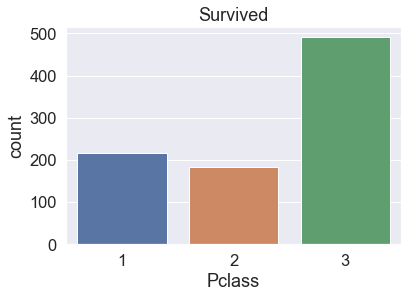

In [155]:
sn.set(font_scale=1.5)
sn.countplot(D_Train['Pclass']).set_title("Survived")

Text(0.5, 1.0, 'Survived')

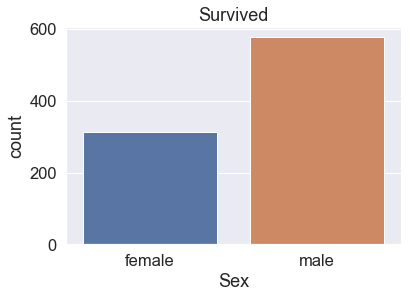

In [156]:
sn.set(font_scale=1.5)
sn.countplot(D_Train['Sex']).set_title("Survived")

Text(0.5, 1.0, 'Survived')

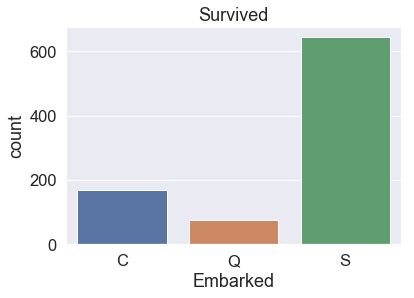

In [157]:
sn.set(font_scale=1.5)
sn.countplot(D_Train['Embarked']).set_title("Survived")

In [159]:
D_Train['Embarked'].fillna('S',inplace=True)

In [160]:
D_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.6+ KB


Text(0.5, 1.0, 'Survived')

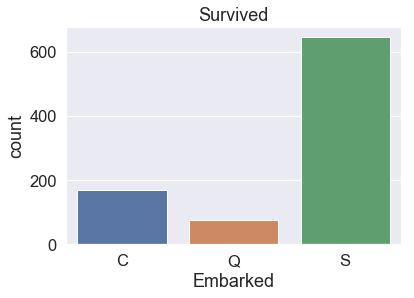

In [161]:
sn.set(font_scale=1.5)
sn.countplot(D_Train['Embarked']).set_title("Survived")

In [162]:
D_N=D_Train[['Pclass','Sex','Embarked','Survived']]

In [163]:
D_N.head()

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0


In [164]:
D_Train_Label=D_N['Survived']

In [165]:
D_N.head()

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0


In [166]:
D_Train=D_N[['Pclass','Sex','Embarked']]

In [167]:
D_Train.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [168]:
D_Train_Label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [184]:
p_l_e=LabelEncoder()
Pclass_Label=p_l_e.fit_transform(D_Train['Pclass'])
s_l_e=LabelEncoder()
Sex_Label=s_l_e.fit_transform(D_Train['Sex'])
e_l_e=LabelEncoder()
Embarked_Label=e_l_e.fit_transform(D_Train['Embarked'])

D_Train['Pclass_Labels']=Pclass_Label
D_Train['Sex_Labels']=Sex_Label
D_Train['Embarked_Labels']=Embarked_Label

In [170]:
D_Train.head()

,Pclass,Sex,Embarked,Pclass_Labels,Sex_Labels,Embarked_Labels
0,3,male,S,2,1,2
1,1,female,C,0,0,0
2,3,female,S,2,0,2
3,1,female,S,0,0,2
4,3,male,S,2,1,2


In [185]:
p_o_h_e=OneHotEncoder()
Pclass_ohe_array=p_o_h_e.fit_transform(D_Train[['Pclass_Labels']]).toarray()
Pclass_Feature_Label=['Pclass-'+str(items) for items in p_l_e.classes_]
Pclass_Feature = pd.DataFrame(Pclass_ohe_array,columns=Pclass_Feature_Label)

C:\Users\Data Science\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [182]:
print(Pclass_Feature)

     Pclass-1  Pclass-2  Pclass-3
0         0.0       0.0       1.0
1         1.0       0.0       0.0
2         0.0       0.0       1.0
3         1.0       0.0       0.0
4         0.0       0.0       1.0
5         0.0       0.0       1.0
6         1.0       0.0       0.0
7         0.0       0.0       1.0
8         0.0       0.0       1.0
9         0.0       1.0       0.0
10        0.0       0.0       1.0
11        1.0       0.0       0.0
12        0.0       0.0       1.0
13        0.0       0.0       1.0
14        0.0       0.0       1.0
15        0.0       1.0       0.0
16        0.0       0.0       1.0
17        0.0       1.0       0.0
18        0.0       0.0       1.0
19        0.0       0.0       1.0
20        0.0       1.0       0.0
21        0.0       1.0       0.0
22        0.0       0.0       1.0
23        1.0       0.0       0.0
24        0.0       0.0       1.0
25        0.0       0.0       1.0
26        0.0       0.0       1.0
27        1.0       0.0       0.0
28        0.0 

In [186]:
s_o_h_e=OneHotEncoder()
Sex_ohe_array=s_o_h_e.fit_transform(D_Train[['Sex_Labels']]).toarray()
Sex_Feature_Label=['Sex-'+str(items) for items in s_l_e.classes_]
Sex_Feature = pd.DataFrame(Sex_ohe_array,columns=Sex_Feature_Label)

C:\Users\Data Science\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [183]:
print(Sex_Feature)

     Sex-female  Sex-male
0           0.0       1.0
1           1.0       0.0
2           1.0       0.0
3           1.0       0.0
4           0.0       1.0
5           0.0       1.0
6           0.0       1.0
7           0.0       1.0
8           1.0       0.0
9           1.0       0.0
10          1.0       0.0
11          1.0       0.0
12          0.0       1.0
13          0.0       1.0
14          1.0       0.0
15          1.0       0.0
16          0.0       1.0
17          0.0       1.0
18          1.0       0.0
19          1.0       0.0
20          0.0       1.0
21          0.0       1.0
22          1.0       0.0
23          0.0       1.0
24          1.0       0.0
25          1.0       0.0
26          0.0       1.0
27          0.0       1.0
28          1.0       0.0
29          0.0       1.0
..          ...       ...
861         0.0       1.0
862         1.0       0.0
863         1.0       0.0
864         0.0       1.0
865         1.0       0.0
866         1.0       0.0
867         

In [187]:
e_o_h_e=OneHotEncoder()
Embarked_ohe_array=e_o_h_e.fit_transform(D_Train[['Embarked_Labels']]).toarray()
Embarked_Feature_Label=['Embarked-'+str(items) for items in e_l_e.classes_]
Embarked_Feature = pd.DataFrame(Embarked_ohe_array,columns=Embarked_Feature_Label)

C:\Users\Data Science\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [211]:
D_Test['Pclass']=D_Test['Pclass'].astype("category")
D_Test['Survived']=D_Test['Survived'].astype("category")
D_Test['Sex']=D_Test['Sex'].astype("category")
D_Test['Embarked']=D_Test['Embarked'].astype("category")

In [212]:
D_N=D_Test[['Pclass','Sex','Embarked','Survived']]
D_Test_Label=D_N['Survived']
D_Test=D_N[['Pclass','Sex','Embarked']]

In [213]:
p_l_e=LabelEncoder()
Pclass_Label=p_l_e.fit_transform(D_Test['Pclass'])

s_l_e=LabelEncoder()
Sex_Label=s_l_e.fit_transform(D_Test['Sex'])

e_l_e=LabelEncoder()
Embarked_Label=e_l_e.fit_transform(D_Test['Embarked'])

D_Test['Pclass_Labels']=Pclass_Label
D_Test['Sex_Labels']=Sex_Label
D_Test['Embarked_Labels']=Embarked_Label

In [214]:
p_o_h_e=OneHotEncoder()
Pclass_ohe_array=p_o_h_e.fit_transform(D_Test[['Pclass_Labels']]).toarray()
Pclass_Feature_Label=['Pclass-'+str(items) for items in p_l_e.classes_]
Pclass_Feature = pd.DataFrame(Pclass_ohe_array,columns=Pclass_Feature_Label)

s_o_h_e=OneHotEncoder()
Sex_ohe_array=s_o_h_e.fit_transform(D_Test[['Sex_Labels']]).toarray()
Sex_Feature_Label=['Sex-'+str(items) for items in s_l_e.classes_]
Sex_Feature = pd.DataFrame(Sex_ohe_array,columns=Sex_Feature_Label)

e_o_h_e=OneHotEncoder()
Embarked_ohe_array=e_o_h_e.fit_transform(D_Test[['Embarked_Labels']]).toarray()
Embarked_Feature_Label=['Embarked-'+str(items) for items in e_l_e.classes_]
Embarked_Feature = pd.DataFrame(Embarked_ohe_array,columns=Embarked_Feature_Label)

C:\Users\Data Science\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Data Science\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".


In [188]:
Pre_D_Train = pd.concat([D_Train, Pclass_Feature, Sex_Feature, Embarked_Feature], axis=1)

In [202]:
Pre_D_Train.head()

,Pclass,Sex,Embarked,Pclass_Labels,Sex_Labels,Embarked_Labels,Pclass-1,Pclass-2,Pclass-3,Sex-female,Sex-male,Embarked-C,Embarked-Q,Embarked-S
0,3,male,S,2,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,female,C,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,female,S,2,0,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,female,S,0,0,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,male,S,2,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [215]:
Pre_D_Test = pd.concat([D_Test, Pclass_Feature, Sex_Feature, Embarked_Feature], axis=1)

In [216]:
Pre_D_Test.head()

,Pclass,Sex,Embarked,Pclass_Labels,Sex_Labels,Embarked_Labels,Pclass-1,Pclass-2,Pclass-3,Sex-female,Sex-male,Embarked-C,Embarked-Q,Embarked-S
0,3,male,Q,2,1,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3,female,S,2,0,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2,male,Q,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,male,S,2,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3,female,S,2,0,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [206]:
D_Train=Pre_D_Train[["Pclass-1","Pclass-2","Pclass-3","Sex-female","Sex-male","Embarked-C","Embarked-Q","Embarked-S"]]

In [207]:
D_Train.astype("int")

,Pclass-1,Pclass-2,Pclass-3,Sex-female,Sex-male,Embarked-C,Embarked-Q,Embarked-S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1
8,0,0,1,1,0,0,0,1
9,0,1,0,1,0,1,0,0


In [217]:
D_Test=Pre_D_Test[["Pclass-1","Pclass-2","Pclass-3","Sex-female","Sex-male","Embarked-C","Embarked-Q","Embarked-S"]]

In [209]:
D_T,D_Cv,D_T_L,D_Cv_L=train_test_split(D_Train,D_Train_Label,test_size=0.2,random_state=0)

In [210]:
for i in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(D_T,D_T_L)
    pred=knn.predict(D_Cv)
    acc=accuracy_score(D_Cv_L,pred,normalize=True) * float(100)
    print('\nCV accuracy for k= %d is %d%%' %(i,acc))


CV accuracy for k= 1 is 68%

CV accuracy for k= 3 is 81%

CV accuracy for k= 5 is 81%

CV accuracy for k= 7 is 81%

CV accuracy for k= 9 is 80%

CV accuracy for k= 11 is 81%

CV accuracy for k= 13 is 81%

CV accuracy for k= 15 is 82%

CV accuracy for k= 17 is 82%

CV accuracy for k= 19 is 82%

CV accuracy for k= 21 is 82%

CV accuracy for k= 23 is 82%

CV accuracy for k= 25 is 82%

CV accuracy for k= 27 is 82%

CV accuracy for k= 29 is 82%

CV accuracy for k= 31 is 82%

CV accuracy for k= 33 is 82%

CV accuracy for k= 35 is 82%

CV accuracy for k= 37 is 82%

CV accuracy for k= 39 is 80%

CV accuracy for k= 41 is 82%

CV accuracy for k= 43 is 82%

CV accuracy for k= 45 is 80%

CV accuracy for k= 47 is 80%

CV accuracy for k= 49 is 80%



The optimal number of neighbors is 21.


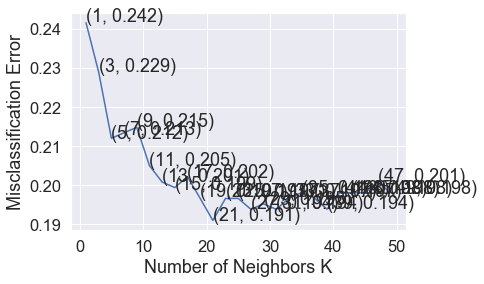

the misclassification error for each k value is :  [0.242 0.229 0.212 0.213 0.215 0.205 0.201 0.199 0.202 0.197 0.191 0.197
 0.197 0.194 0.195 0.194 0.197 0.198 0.197 0.194 0.198 0.198 0.198 0.201
 0.198]


In [223]:
import numpy as np
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, D_T, D_T_L, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each k value is : ", np.round(MSE,3))

In [224]:
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k) 
knn_optimal.fit(D_T,D_T_L)
pred=knn_optimal.predict(D_Test)
acc=accuracy_score(D_Test_Label,pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k,acc))


The accuracy of the knn classifier for k = 21 is 90.191388%
